In [6]:
import os
import cv2
import numpy as np
import glob
import rasterio
import numpy as np
from matplotlib import pyplot as plt
from patchify import patchify
import tifffile as tiff
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.metrics import MeanIoU
import random


In [4]:
temp_img_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
temp_mask_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
temp_ndvi_path = "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDVI/NDVI_Landsat_2022_01_NDVI.tif.tif"
temp_evi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/EVI/EVI_Landsat_2022_01_EVI.tif.tif"
temp_ndwi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDWI/NDWI_Landsat_2022_01_NDWI.tif.tif"
temp_nir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_2022_01_NIR.tif.tif"
temp_red_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_2022_01_RED.tif.tif"
temp_swir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/SWIR/Landsat_Landsat_2022_01_SWIR.tif.tif"
temp_tirs_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/TIRS/Landsat_Landsat_2022_01_TIRS.tif.tif"
temp_cont_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CONTRAST/GLCM_contrast_2022.tif.tif"
temp_diss_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/DISSIMILARITY/GLCM_dissimilarity_2022.tif.tif"
temp_corr_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CORRELATION/GLCM_correlation_2022.tif.tif"
temp_slp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/SLOPE/Slope.tif"
temp_asp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ASPECT/Aspect.tif"
temp_elv_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ELEVATION/Elevation.tif"

# Check if the image files exist
import os
print("Image file exists:", os.path.exists(temp_img_path))
print("Mask file exists:", os.path.exists(temp_mask_path))
print("Mask file exists:", os.path.exists(temp_ndvi_path))
print("Mask file exists:", os.path.exists(temp_evi_path))
print("Mask file exists:", os.path.exists(temp_ndwi_path))
print("Mask file exists:", os.path.exists(temp_nir_path))
print("Mask file exists:", os.path.exists(temp_red_path))
print("Mask file exists:", os.path.exists(temp_swir_path))
print("Mask file exists:", os.path.exists(temp_tirs_path))
print("Mask file exists:", os.path.exists(temp_cont_path))
print("Mask file exists:", os.path.exists(temp_ndwi_path))
print("Mask file exists:", os.path.exists(temp_diss_path))
print("Mask file exists:", os.path.exists(temp_corr_path))
print("Mask file exists:", os.path.exists(temp_slp_path))
print("Mask file exists:", os.path.exists(temp_asp_path))
print("Mask file exists:", os.path.exists(temp_elv_path))

Image file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True
Mask file exists: True


Labels are: [1 2 3 4 5 6] and the counts are: [1037637  964855  471050 1117847   30291  184121]


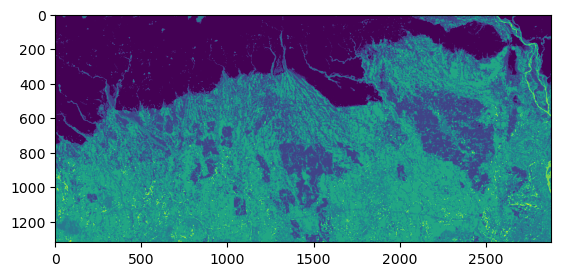

In [7]:
# Check if the image files exist
if os.path.exists(temp_img_path) and os.path.exists(temp_mask_path):
    # Load the image using rasterio
    with rasterio.open(temp_img_path) as img_ds:
        # Read the image data and replace NaN with zero
        temp_img = img_ds.read()
        temp_img = np.nan_to_num(temp_img, nan=0)
        
        # Visualize one of the channels (adjust the index as needed)
        plt.imshow(temp_img[0, :, :])  # Adjust the channel index as needed

    # Load the mask using rasterio
    with rasterio.open(temp_mask_path) as mask_ds:
        temp_mask = mask_ds.read()
        temp_mask = np.nan_to_num(temp_mask, nan=0)
        
        #plt.imshow(temp_mask[0, :, :])  # Adjust the channel index as needed
        

        # Check the unique labels in the mask
        labels, count = np.unique(temp_mask[0, :, :], return_counts=True)

        print("Labels are:", labels, "and the counts are:", count)
else:
    print("Image file or mask file does not exist or file paths are incorrect.")

# Show the image
plt.show()

In [8]:
print(temp_img.shape)

(1, 1321, 2881)


Labels are: [1 2 3 4 5 6] and the counts are: [1037637  964855  471050 1117847   30291  184121]


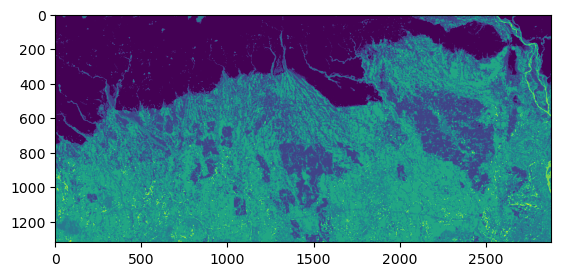

In [9]:
# Load the image using Rasterio
with rasterio.open(temp_img_path) as src:
    temp_img = src.read()

# View each channel
plt.imshow(temp_img[0, :, :])  # Assuming you want to view the third channel (0-indexed)

# Load the mask using Rasterio
with rasterio.open(temp_mask_path) as src:
    temp_mask = src.read()

# Replace NaN values with zero in both the image and mask
temp_img = np.nan_to_num(temp_img)
temp_mask = np.nan_to_num(temp_mask)

# Check unique labels in the mask
labels, count = np.unique(temp_mask[0, :, :], return_counts=True)  # Assuming the mask has only one channel
print("Labels are:", labels, "and the counts are:", count)


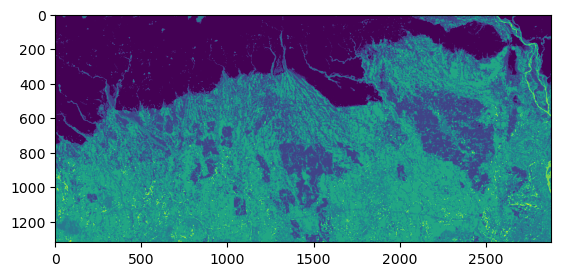

In [8]:
plt.imshow(temp_mask[0, :, :])

In [12]:
img_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
mask_path = "D:/Jintu/Jintu_LULC/TestDL_3/Random Forest/rf_mask_1.tif"
ndvi_path = "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDVI/NDVI_Landsat_2022_01_NDVI.tif.tif"
evi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/EVI/EVI_Landsat_2022_01_EVI.tif.tif"
ndwi_path= "D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NDWI/NDWI_Landsat_2022_01_NDWI.tif.tif"
nir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/NIR/Landsat_Landsat_2022_01_NIR.tif.tif"
red_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/RED/Landsat_Landsat_2022_01_RED.tif.tif"
swir_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/SWIR/Landsat_Landsat_2022_01_SWIR.tif.tif"
tirs_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/TIRS/Landsat_Landsat_2022_01_TIRS.tif.tif"
cont_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CONTRAST/GLCM_contrast_2022.tif.tif"
diss_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/DISSIMILARITY/GLCM_dissimilarity_2022.tif.tif"
corr_path="D:/Jintu/Jintu_LULC/TestDL_5/DL_Prediction/CORRELATION/GLCM_correlation_2022.tif.tif"
slp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/SLOPE/Slope.tif"
asp_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ASPECT/Aspect.tif"
elv_path="D:/Jintu/Jintu_LULC/TestDL_4/DL_Prediction/ELEVATION/Elevation.tif"

In [13]:
# Loop through subdirectories and process images
for path, subdirs, files in os.walk("D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"):
    for image_name in files:
        if image_name.endswith(".tif"):
            image_path = os.path.join(path, image_name)

In [11]:
#patches the ndwi evi ndvi, lulc and sentinel images

In [15]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_LULC/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/ndwi/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(ndwi_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/ndwi/", 'ndwi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_101.tif
Saved patch 102 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_102.tif
Saved patch 103 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_103.tif
Saved patch 104 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_104.tif
Saved patch 105 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_105.tif
Saved patch 106 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_106.tif
Saved patch 107 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/ndwi_patch_107.tif
Saved patch 108 from ndwi_patch_0.

In [50]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/evi/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(evi_path)



# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/evi/", 'evi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/D

Saved patch 63 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_63.tif
Saved patch 64 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_64.tif
Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFo

Saved patch 125 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_125.tif
Saved patch 126 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_126.tif
Saved patch 127 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_127.tif
Saved patch 128 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_128.tif
Saved patch 129 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_129.tif
Saved patch 130 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_130.tif
Saved patch 131 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_131.tif
Saved patch 132 from ndwi_patch_0.tif as D:/Jint

Saved patch 188 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_188.tif
Saved patch 189 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_189.tif
Saved patch 190 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_190.tif
Saved patch 191 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_191.tif
Saved patch 192 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_192.tif
Saved patch 193 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_193.tif
Saved patch 194 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/evi_patch_194.tif
Saved patch 195 from ndwi_patch_0.tif as D:/Jint

In [18]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/ndvi/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(ndvi_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/ndvi/", 'ndvi' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")

Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 65 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_65.tif
Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu

Saved patch 164 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_164.tif
Saved patch 165 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_165.tif
Saved patch 166 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_166.tif
Saved patch 167 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_167.tif
Saved patch 168 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_168.tif
Saved patch 169 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_169.tif
Saved patch 170 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/ndvi_patch_170.tif
Saved patch 171 from ndwi_patch_0.

In [26]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/nir/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(nir_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/nir/", 'nir' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/D

Saved patch 97 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_97.tif
Saved patch 98 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_98.tif
Saved patch 99 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_99.tif
Saved patch 100 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_100.tif
Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_101.tif
Saved patch 102 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_102.tif
Saved patch 103 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_103.tif
Saved patch 104 from ndwi_patch_0.tif as D:/Jintu/Jint

Saved patch 170 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_170.tif
Saved patch 171 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_171.tif
Saved patch 172 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_172.tif
Saved patch 173 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_173.tif
Saved patch 174 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_174.tif
Saved patch 175 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_175.tif
Saved patch 176 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/nir_patch_176.tif
Saved patch 177 from ndwi_patch_0.tif as D:/Jint

In [27]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/red/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(red_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/red/", 'red' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/D

Saved patch 96 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_96.tif
Saved patch 97 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_97.tif
Saved patch 98 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_98.tif
Saved patch 99 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_99.tif
Saved patch 100 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_100.tif
Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_101.tif
Saved patch 102 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_102.tif
Saved patch 103 from ndwi_patch_0.tif as D:/Jintu/Jintu_

Saved patch 185 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_185.tif
Saved patch 186 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_186.tif
Saved patch 187 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_187.tif
Saved patch 188 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_188.tif
Saved patch 189 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_189.tif
Saved patch 190 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_190.tif
Saved patch 191 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/red_patch_191.tif
Saved patch 192 from ndwi_patch_0.tif as D:/Jint

In [28]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/swir/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(nir_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/swir/", 'swir' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 91 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_91.tif
Saved patch 92 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_92.tif
Saved patch 93 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_93.tif
Saved patch 94 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_94.tif
Saved patch 95 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_95.tif
Saved patch 96 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_96.tif
Saved patch 97 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_97.tif
Saved patch 98 from ndwi_patch_0.tif as D:/Jintu

Saved patch 178 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_178.tif
Saved patch 179 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_179.tif
Saved patch 180 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_180.tif
Saved patch 181 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_181.tif
Saved patch 182 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_182.tif
Saved patch 183 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_183.tif
Saved patch 184 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/swir_patch_184.tif
Saved patch 185 from ndwi_patch_0.

In [29]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/contrast/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(cont_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/contrast/", 'contrast' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_6.tif
Saved 

Saved patch 95 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_95.tif
Saved patch 96 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_96.tif
Saved patch 97 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_97.tif
Saved patch 98 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_98.tif
Saved patch 99 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_99.tif
Saved patch 100 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_100.tif
Saved patch 101 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_pa

Saved patch 163 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_163.tif
Saved patch 164 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_164.tif
Saved patch 165 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_165.tif
Saved patch 166 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_166.tif
Saved patch 167 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_167.tif
Saved patch 168 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/contrast_patch_168.tif
Saved patch 169 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/c

In [30]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/dissimilarity/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(diss_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/dissimilarity/", 'dis' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_6.tif
Saved 

Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_72.tif
Saved patch 73 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_73.tif
Saved patch 74 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch

Saved patch 134 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_134.tif
Saved patch 135 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_135.tif
Saved patch 136 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_136.tif
Saved patch 137 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_137.tif
Saved patch 138 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_138.tif
Saved patch 139 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_139.tif
Saved patch 140 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilar

Saved patch 206 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_206.tif
Saved patch 207 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_207.tif
Saved patch 208 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_208.tif
Saved patch 209 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_209.tif
Saved patch 210 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_210.tif
Saved patch 211 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/dis_patch_211.tif
Saved patch 212 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilar

In [31]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/correlation/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(corr_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/correlation/", 'corr' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_6.tif
Saved patch 7

Saved patch 66 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_66.tif
Saved patch 67 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_67.tif
Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_72.tif

Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_153.tif
Saved patch 154 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_154.tif
Saved patch 155 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_155.tif
Saved patch 156 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_156.tif
Saved patch 157 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_157.tif
Saved patch 158 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr_patch_158.tif
Saved patch 159 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/corr

In [32]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/slope/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(slp_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/slope/", 'slp' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 68 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_68.tif
Saved patch 69 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_69.tif
Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_72.tif
Saved patch 73 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_73.tif
Saved patch 74 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_74.tif
Saved patch 75 from ndwi_patch_0.tif as D:/Jintu

Saved patch 136 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_136.tif
Saved patch 137 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_137.tif
Saved patch 138 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_138.tif
Saved patch 139 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_139.tif
Saved patch 140 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_140.tif
Saved patch 141 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_141.tif
Saved patch 142 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_142.tif
Saved patch 143 from ndwi_patch_0.

Saved patch 214 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_214.tif
Saved patch 215 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_215.tif
Saved patch 216 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_216.tif
Saved patch 217 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_217.tif
Saved patch 218 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_218.tif
Saved patch 219 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/slp_patch_219.tif


In [33]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/aspect/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(asp_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/aspect/", 'asp' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_S

Saved patch 75 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_75.tif
Saved patch 76 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_76.tif
Saved patch 77 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_77.tif
Saved patch 78 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_78.tif
Saved patch 79 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_79.tif
Saved patch 80 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_80.tif
Saved patch 81 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_81.tif
Saved patch 82 from ndwi_patch_0.tif as D

Saved patch 163 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_163.tif
Saved patch 164 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_164.tif
Saved patch 165 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_165.tif
Saved patch 166 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_166.tif
Saved patch 167 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_167.tif
Saved patch 168 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_168.tif
Saved patch 169 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/asp_patch_169.tif
Saved patch 170 from ndwi_p

In [34]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_5/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/elevation/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(elv_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/elevation/", 'elv' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_6.tif
Saved patch 7 from ndwi_patch_0.ti

Saved patch 85 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_85.tif
Saved patch 86 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_86.tif
Saved patch 87 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_87.tif
Saved patch 88 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_88.tif
Saved patch 89 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_89.tif
Saved patch 90 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_90.tif
Saved patch 91 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_91.tif
Saved patch 92 from 

Saved patch 147 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_147.tif
Saved patch 148 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_148.tif
Saved patch 149 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_149.tif
Saved patch 150 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_150.tif
Saved patch 151 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_151.tif
Saved patch 152 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_152.tif
Saved patch 153 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/elv_patch_153.tif
Saved 

In [43]:
# Loop through subdirectories and process images
for path, subdirs, files in os.walk("D:/Jintu/Jintu_ShareFolder/TestDL/Data/"):
    for image_name in files:
        if image_name.endswith(".tif"):
            image_path = os.path.join(path, image_name)

In [24]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/lulc/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(mask_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/lulc/", 'mask' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 72 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_72.tif
Saved patch 73 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_73.tif
Saved patch 74 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_74.tif
Saved patch 75 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_75.tif
Saved patch 76 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_76.tif
Saved patch 77 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_77.tif
Saved patch 78 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_78.tif
Saved patch 79 from ndwi_patch_0.tif as D:/Jintu

Saved patch 158 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_158.tif
Saved patch 159 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_159.tif
Saved patch 160 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_160.tif
Saved patch 161 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_161.tif
Saved patch 162 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_162.tif
Saved patch 163 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_163.tif
Saved patch 164 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/mask_patch_164.tif
Saved patch 165 from ndwi_patch_0.

In [36]:
import os
import numpy as np
import rasterio
from rasterio.windows import Window

# Define the root directory where you want to save patches
root_directory = "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/"

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
os.makedirs(root_directory + "64_patches/tirs/", exist_ok=True)

# Define the patch size
patch_size = 128

# Create directories for the cropped and patchified images
#os.makedirs(output_directory, exist_ok=True)

# Function to crop and patchify an image
def crop_and_patchify_image(image_path):
    with rasterio.open(image_path) as src:
        image = src.read()  # Read the image using Rasterio
        image[np.isnan(image)] = 0

    SIZE_X = (image.shape[2] // patch_size) * patch_size  # Nearest size divisible by patch_size
    SIZE_Y = (image.shape[1] // patch_size) * patch_size  # Nearest size divisible by patch_size

    # Crop the image
    image = image[:, :SIZE_Y, :SIZE_X]

    # Patchify the image
    patches_img = []
    for i in range(0, SIZE_Y, patch_size):
        for j in range(0, SIZE_X, patch_size):
            window = Window(j, i, patch_size, patch_size)
            patch = image[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
            patches_img.append(patch)

    return patches_img

# Loop through subdirectories and process images
# for path, subdirs, files in os.walk(input_directory):
#     for image_name in files:
#         if image_name.endswith(".tif"):
#             image_path = os.path.join(path, image_name)
            
# Crop and patchify the image
patches = crop_and_patchify_image(tirs_path)

# Save the patches as TIFF files
for idx, patch in enumerate(patches):
    # Define the output file path for the patch
    patch_output_path = os.path.join(root_directory + "64_patches/tirs/", 'tirs' + "_patch_" + str(idx) + ".tif")

    # Create a new TIFF file using Rasterio
    with rasterio.open(
        patch_output_path,
        'w',
        driver='GTiff',
        height=patch.shape[1],
        width=patch.shape[2],
        count=patch.shape[0],
        dtype=patch.dtype
    ) as dst:
        dst.write(patch)

    print(f"Saved patch {idx} from {image_name} as {patch_output_path}")


Saved patch 0 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_0.tif
Saved patch 1 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_1.tif
Saved patch 2 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_2.tif
Saved patch 3 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_3.tif
Saved patch 4 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_4.tif
Saved patch 5 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_5.tif
Saved patch 6 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_6.tif
Saved patch 7 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFol

Saved patch 70 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_70.tif
Saved patch 71 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_71.tif
Saved patch 72 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_72.tif
Saved patch 73 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_73.tif
Saved patch 74 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_74.tif
Saved patch 75 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_75.tif
Saved patch 76 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_76.tif
Saved patch 77 from ndwi_patch_0.tif as D:/Jintu

Saved patch 137 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_137.tif
Saved patch 138 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_138.tif
Saved patch 139 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_139.tif
Saved patch 140 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_140.tif
Saved patch 141 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_141.tif
Saved patch 142 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_142.tif
Saved patch 143 from ndwi_patch_0.tif as D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/tirs_patch_143.tif
Saved patch 144 from ndwi_patch_0.

In [37]:
#train_image_dir="D:/Jintu/Jintu_ShareFolder/TestDL/Data/Datasets64_patches/sentinel/"
train_mask_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/lulc/"
train_ndvi_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndvi/"
train_evi_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/evi/"
train_ndwi_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/ndwi/"
train_nir_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/nir/"
train_red_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/red/"
train_swir_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/swir/"
train_contrast_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/contrast/"
train_diss_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/dissimilarity/"
train_corr_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/correlation/"
train_slp_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/slope/"
train_asp_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/aspect/"
train_elv_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/elevation/"
train_tir_dir="D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/64_patches/tirs/"

In [41]:
img_list = os.listdir(train_mask_dir)
msk_list = os.listdir(train_mask_dir)
ndvi_list=os.listdir(train_ndvi_dir)
evi_list=os.listdir(train_evi_dir)
ndwi_list=os.listdir(train_ndwi_dir)
nir_list=os.listdir(train_nir_dir)
red_list=os.listdir(train_red_dir)
swir_list=os.listdir(train_swir_dir)
tir_list=os.listdir(train_tir_dir)
cont_list=os.listdir(train_contrast_dir)
diss_list=os.listdir(train_diss_dir)
corr_list=os.listdir(train_corr_dir)
slp_list=os.listdir(train_slp_dir)
asp_list=os.listdir(train_asp_dir)
elv_list=os.listdir(train_elv_dir)

In [45]:
import rasterio
import numpy as np

useless = 0  # Useless image counter

for img in range(len(img_list)):  # Using t1_list as all lists are of the same size
    nir_name = nir_list[img]
    mask_name = msk_list[img]
    ndvi_name=ndvi_list[img]
    evi_name=evi_list[img]
    ndwi_name=ndwi_list[img]
    red_name=red_list[img]
    swir_name=swir_list[img]
    tir_name=tir_list[img]
    cont_name=cont_list[img]
    diss_name=diss_list[img]
    corr_name=corr_list[img]
    slp_name=slp_list[img]
    asp_name=asp_list[img]
    elv_name=elv_list[img]
    
    
    print("Now preparing image and masks number: ", img)

    with rasterio.open(train_nir_dir + nir_list[img], 'r') as src:
        temp_nir = src.read()
        profile = src.profile  # Retrieve the profile before exiting the 'with' block

    with rasterio.open(train_mask_dir + msk_list[img], 'r') as src:
        temp_mask = src.read(1)  # Read the first band
        
    with rasterio.open(train_ndvi_dir + ndvi_list[img], 'r') as src:
        temp_ndvi = src.read(1)  # Read the first band
        
    with rasterio.open(train_evi_dir + evi_list[img], 'r') as src:
        temp_evi = src.read(1)  # Read the first band
        
        
    with rasterio.open(train_ndwi_dir + ndwi_list[img], 'r') as src:
        temp_ndwi = src.read(1)  # Read the first band
              
        
    with rasterio.open(train_red_dir + red_list[img], 'r') as src:
        temp_red = src.read(1)  # Read the first band
            
        
    with rasterio.open(train_swir_dir + swir_list[img], 'r') as src:
        temp_swir = src.read(1)  # Read the first band
             
        
    with rasterio.open(train_tir_dir + tir_list[img], 'r') as src:
        temp_tir = src.read(1)  # Read the first band   
             
        
    with rasterio.open(train_contrast_dir + cont_list[img], 'r') as src:
        temp_cont = src.read(1)  # Read the first band   
              
        
    with rasterio.open(train_diss_dir + diss_list[img], 'r') as src:
        temp_diss = src.read(1)  # Read the first band   
            
        
    with rasterio.open(train_corr_dir + corr_list[img], 'r') as src:
        temp_corr = src.read(1)  # Read the first band   
              
        
    with rasterio.open(train_slp_dir + slp_list[img], 'r') as src:
        temp_slp = src.read(1)  # Read the first band   
              
        
    with rasterio.open(train_asp_dir + asp_list[img], 'r') as src:
        temp_asp = src.read(1)  # Read the first band   
             
        
    with rasterio.open(train_elv_dir + elv_list[img], 'r') as src:
        temp_elv = src.read(1)  # Read the first band    
        

    val, counts = np.unique(temp_mask, return_counts=True)

    if (1 - (counts[0] / counts.sum())) > 0.05:  # At least 5% useful area with labels that are not 0
        print("Save Me")
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/nir/' + nir_name, 'w', **profile) as dst:
            dst.write(temp_nir)

        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/lulc/' + mask_name, 'w', **profile) as dst:
            dst.write(temp_mask, 1)  # Write to the first band

            
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/ndvi/' + ndvi_name, 'w', **profile) as dst:
            dst.write(temp_ndvi, 1)  # Write to the first band
 

        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/evi/' + evi_name, 'w', **profile) as dst:
            dst.write(temp_evi, 1)  # Write to the first band
            
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/ndwi/' + ndwi_name, 'w', **profile) as dst:
            dst.write(temp_ndwi, 1)  # Write to the first band
                    
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/red/' + red_name, 'w', **profile) as dst:
            dst.write(temp_red, 1)  # Write to the first band
                    
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/swir/' + swir_name, 'w', **profile) as dst:
            dst.write(temp_swir, 1)  # Write to the first band
                   
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/tirs/' + tir_name, 'w', **profile) as dst:
            dst.write(temp_tir, 1)  # Write to the first band
                   
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/cont/' + cont_name, 'w', **profile) as dst:
            dst.write(temp_cont, 1)  # Write to the first band
                   
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/diss/' + diss_name, 'w', **profile) as dst:
            dst.write(temp_diss, 1)  # Write to the first band
                   
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/corr/' + corr_name, 'w', **profile) as dst:
            dst.write(temp_corr, 1)  # Write to the first band
                   
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/slp/' + slp_name, 'w', **profile) as dst:
            dst.write(temp_slp, 1)  # Write to the first band
                    
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/asp/' + asp_name, 'w', **profile) as dst:
            dst.write(temp_asp, 1)  # Write to the first band
                    
        with rasterio.open('D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/elv/' + elv_name, 'w', **profile) as dst:
            dst.write(temp_elv, 1)  # Write to the first band
            
                       
               
            
    else:
        print("I am useless")
        useless += 1

print("Total useful images are: ", len(img_list) - useless)  # 20,075
print("Total useless images are: ", useless)  # 21,571


Now preparing image and masks number:  0
I am useless
Now preparing image and masks number:  1
I am useless
Now preparing image and masks number:  2
I am useless
Now preparing image and masks number:  3
Save Me
Now preparing image and masks number:  4
Save Me
Now preparing image and masks number:  5
Save Me
Now preparing image and masks number:  6
Save Me
Now preparing image and masks number:  7
Save Me
Now preparing image and masks number:  8
Save Me
Now preparing image and masks number:  9
Save Me
Now preparing image and masks number:  10
Save Me
Now preparing image and masks number:  11
Save Me
Now preparing image and masks number:  12
Save Me
Now preparing image and masks number:  13
I am useless
Now preparing image and masks number:  14
Save Me
Now preparing image and masks number:  15
Save Me
Now preparing image and masks number:  16
Save Me
Now preparing image and masks number:  17
Save Me
Now preparing image and masks number:  18
Save Me
Now preparing image and masks number:  1

I am useless
Now preparing image and masks number:  161
I am useless
Now preparing image and masks number:  162
I am useless
Now preparing image and masks number:  163
I am useless
Now preparing image and masks number:  164
I am useless
Now preparing image and masks number:  165
I am useless
Now preparing image and masks number:  166
I am useless
Now preparing image and masks number:  167
Save Me
Now preparing image and masks number:  168
Save Me
Now preparing image and masks number:  169
Save Me
Now preparing image and masks number:  170
Save Me
Now preparing image and masks number:  171
Save Me
Now preparing image and masks number:  172
Save Me
Now preparing image and masks number:  173
Save Me
Now preparing image and masks number:  174
Save Me
Now preparing image and masks number:  175
Save Me
Now preparing image and masks number:  176
Save Me
Now preparing image and masks number:  177
Save Me
Now preparing image and masks number:  178
Save Me
Now preparing image and masks number:  

In [46]:
import splitfolders

In [47]:
input_folder= "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/with usefull info/"
output_folder= "D:/Jintu/Jintu_ShareFolder/TestDL_3/Data Preparation/Patchify/Train_Testing/"

In [48]:
# Split with a ratio.
# To only split into training and validation set, set a tuple to `ratio`, i.e, `(.8, .2)`.
splitfolders.ratio(input_folder, output=output_folder, seed=42, ratio=(.75, .25), group_prefix=None) # default values
########################################

Copying files: 2520 files [00:08, 301.03 files/s]


In [35]:
import os
os.environ["SM_FRAMEWORK"] = "tf.keras"
import cv2
import numpy as np
from matplotlib import pyplot as plt
import segmentation_models as sm
from tensorflow.keras.metrics import MeanIoU
import random

Segmentation Models: using `tf.keras` framework.


In [36]:
train_img_dir = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/train image/train/"
train_mask_dir = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/train mask/train/"

In [37]:
img_list = os.listdir(train_img_dir)
msk_list = os.listdir(train_mask_dir)

(255, 255, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(255, 255, 3)


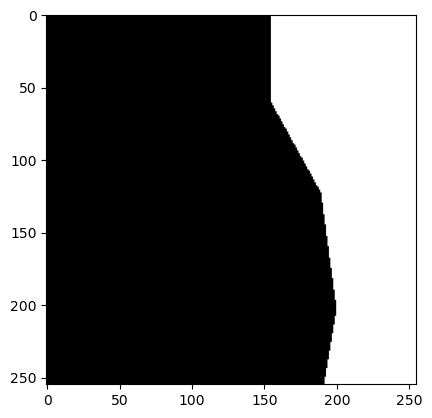

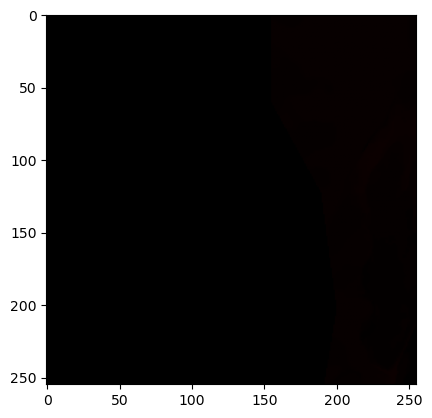

In [38]:
num_images = len(os.listdir(train_img_dir))
img_num = random.randint(0, num_images-1)


import rasterio
from rasterio.plot import reshape_as_raster, reshape_as_image

# Open the image using rasterio
with rasterio.open(train_img_dir + img_list[img_num]) as src:
    # Read the image as an RGB numpy array
    img_for_plot = src.read([3,2,1])  # Assuming bands 1, 2, and 3 are RGB channels
    img_for_plot = img_for_plot.transpose()
    img_for_plot = img_for_plot.astype(float) / 255.0

# Convert from BGR to RGB
img_for_plot_rgb = img_for_plot[:, :, :]  # Swap the order of channels (BGR to RGB)
img_for_plot_rgb = reshape_as_image(img_for_plot_rgb)  # Reshape to an image-like array
print(img_for_plot.shape)


# Open the image using rasterio
with rasterio.open(train_mask_dir + msk_list[img_num]) as src:
    # Read the image as an RGB numpy array
    msk_for_plot = src.read()  # Assuming bands 1, 2, and 3 are RGB channels
    msk_for_plot = msk_for_plot.transpose()
    msk_for_plot = msk_for_plot.astype(float) / 255.0

# Convert from BGR to RGB
#msk_for_plot_rgb = img_for_plot[::-1, :, :]  # Swap the order of channels (BGR to RGB)
#msk_for_plot_rgb = reshape_as_image(msk_for_plot_rgb)  # Reshape to an image-like array
print(msk_for_plot.shape)



plt.imshow(img_for_plot)
plt.axis()  # Turn off axis labels and ticks (optional)
plt.show()


plt.imshow(msk_for_plot,cmap='gray')
plt.axis()  # Turn off axis labels and ticks (optional)
plt.show()

In [39]:
# Define Generator for images and masks so we can read them directly from the drive. 

seed=24
batch_size= 8
n_classes=12

In [40]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
from keras.utils import to_categorical

In [41]:
#Use this to preprocess input for transfer learning
BACKBONE = 'resnet34'
preprocess_input = sm.get_preprocessing(BACKBONE)

In [42]:
#Define a function to perform additional preprocessing after datagen.
#For example, scale images, convert masks to categorical, etc. 
def preprocess_data(img, mask, num_class):
    #Scale images
    img = scaler.fit_transform(img.reshape(-1, img.shape[-1])).reshape(img.shape)
    img = preprocess_input(img)  #Preprocess based on the pretrained backbone...
    #Convert mask to one-hot
    mask = to_categorical(mask, num_class)
      
    return (img,mask)

In [43]:
#Define the generator.
#We are not doing any rotation or zoom to make sure mask values are not interpolated.
#It is important to keep pixel values in mask as 0, 1, 2, 3, .....
from tensorflow.keras.preprocessing.image import ImageDataGenerator
def trainGenerator(train_img_path, train_mask_path, num_class):
    
    img_data_gen_args = dict(horizontal_flip=True,
                      vertical_flip=True,
                      fill_mode='reflect')
        
    image_datagen = ImageDataGenerator(**img_data_gen_args)
    mask_datagen = ImageDataGenerator(**img_data_gen_args)
    
    image_generator = image_datagen.flow_from_directory(
        train_img_path,
        class_mode = None,
        batch_size = batch_size,
        seed = seed)
    
    mask_generator = mask_datagen.flow_from_directory(
        train_mask_path,
        class_mode = None,
        color_mode = 'grayscale',
        batch_size = batch_size,
        seed = seed)
    
    train_generator = zip(image_generator, mask_generator)
    
    for (img, mask) in train_generator:
        img, mask = preprocess_data(img, mask, num_class)
        yield (img, mask)


In [67]:
train_img_path = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/train image/train/"
train_mask_path = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/train mask/"
train_img_gen = trainGenerator(train_img_path, train_mask_path, num_class=12)



val_img_path = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/val image/"
val_mask_path = "D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/val mask/"
val_img_gen = trainGenerator(val_img_path, val_mask_path, num_class=12)

In [78]:
print(train_img_gen)

None


In [79]:
print(train_img_gen)
print(val_img_gen)

None
<generator object trainGenerator at 0x00000284059CCA50>


In [80]:
#Define the model metrcis and load model. 

num_train_imgs = len(os.listdir("D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/train image/train"))
num_val_images = len(os.listdir("D:/FED_RS_GIS/M.Tech. Project/TestDL/U-net/Datasets64_patches/data for model/val image/val"))
steps_per_epoch = num_train_imgs//batch_size
val_steps_per_epoch = num_val_images//batch_size



n_classes=9


In [47]:
IMG_HEIGHT = img_for_plot.shape[0]
IMG_WIDTH  = img_for_plot.shape[1]
IMG_CHANNELS = img_for_plot.shape[2]


print(IMG_HEIGHT)
print(IMG_WIDTH)
print(IMG_CHANNELS)

255
255
3


In [48]:
model = sm.Unet(BACKBONE, encoder_weights='imagenet', 
                input_shape=(IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS),
                classes=n_classes, activation='softmax')
model.compile('Adam', loss=sm.losses.categorical_focal_jaccard_loss, metrics=[sm.metrics.iou_score])

In [49]:
print(model.summary())
print(model.input_shape)

Model: "model_1"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 data (InputLayer)           [(None, 255, 255, 3)]        0         []                            
                                                                                                  
 bn_data (BatchNormalizatio  (None, 255, 255, 3)          9         ['data[0][0]']                
 n)                                                                                               
                                                                                                  
 zero_padding2d (ZeroPaddin  (None, 261, 261, 3)          0         ['bn_data[0][0]']             
 g2D)                                                                                             
                                                                                            

In [ ]:
#MULTICLASS SEGMENTATIONS

In [ ]:
print('k')